# Problem 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lib_hcy_week5 import myfunctions as mf
from scipy.stats import t, norm

In [2]:
p1_data = pd.read_csv("problem1.csv")
p1_data.head()

,x
0,-0.002665
1,-0.045128
2,0.053635
3,0.010450
4,-0.016284


In [3]:
def cal_ES(var, sim_data):
  return -np.mean(sim_data[sim_data <= -var])

In [8]:
var_norm, dist_norm = mf.norm_VaR(p1_data)
es_norm = cal_ES(var_norm, dist_norm)
print("Under Normal Distribution, VaR is {:.4f}, ES is {:.4f}".format(round(var_norm, 4), round(es_norm, 4)))

Under Normal Distribution, VaR is 0.0835, ES is 0.1015


In [9]:
var_t, dist_t = mf.MLE_T_VaR(p1_data)
es_t = cal_ES(var_t, dist_t)
print("Under Generalized T Distribution, VaR is {:.4f}, ES is {:.4f}".format(round(var_t, 4), round(es_t, 4)))

Under Generalized T Distribution, VaR is 0.0769, ES is 0.1230


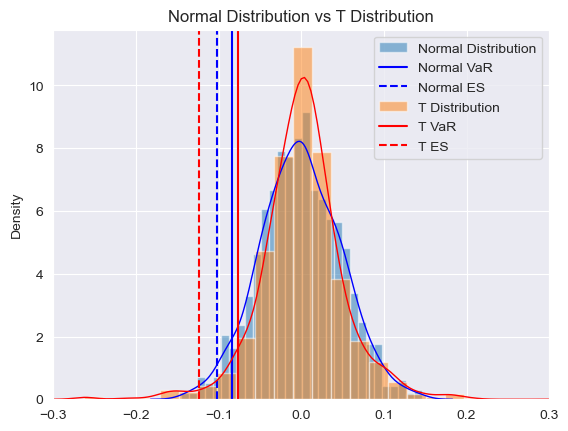

In [10]:
plt.hist(dist_norm, bins=30, density=True, alpha=0.5, label='Normal Distribution') # draw histogram, bins interval is 30, density is True for "the weights are normalized, so that the integral of the density over the range remains 1", alpha 0.5 is half transparent (1 is not transparent), label for legend
sns.kdeplot(dist_norm, color='blue', linewidth=1) # KDE smooth line graph shape
plt.axvline(-var_norm, label='Normal VaR', color='blue', linestyle='-') # draw vertical line at -var_norm
plt.axvline(-es_norm, label='Normal ES', color='blue', linestyle='--')
plt.hist(dist_t, bins=30, density=True, alpha=0.5, label='T Distribution')
sns.kdeplot(dist_t, color='red', linewidth=1)
plt.axvline(-var_t, label='T VaR', color='red', linestyle='-')
plt.axvline(-es_t, label='T ES', color='red', linestyle='--')
plt.xlim(-0.3, 0.3) # limit x to be -0.3 to 0.3, center the graph
plt.legend(loc='upper right') # keep the legend on upper right corner
plt.ylabel('Density') # y-axis label
plt.title('Normal Distribution vs T Distribution') # graph name
plt.show()

# Problem 2

# Problem 3